In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import io
import sys
import pandas as pd

In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from Perceptron import Perceptron

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [5]:
def train(X, y, test_data, test_labels, input_size=1, learning_rate=0.01, epochs=10):
    perceptron = Perceptron(input_size=input_size, learning_rate=learning_rate, epochs=epochs)

    perceptron.trainSGD(X, y)
    true_predict = 0
    for i, data in enumerate(test_data):
        prediction = perceptron.predict(data)
        if prediction == test_labels[i]:
            true_predict += 1
        print(f"Input: {data}, Prediction: {prediction}")
    return true_predict / len(test_labels)

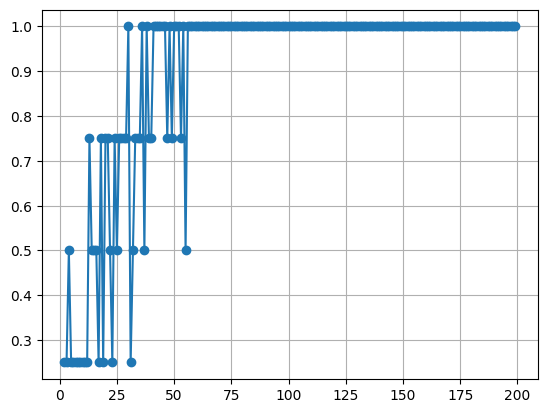

In [6]:
epochs = [i for i in range(2, 200)]
learning_rate = 0.01  
accuracy_epochs = []

original_stdout = sys.stdout
sys.stdout = io.StringIO()

for epoch in epochs:
    accuracy = train(X, y, X, y, input_size=2, learning_rate=learning_rate, epochs=epoch)
    accuracy_epochs.append(accuracy)

sys.stdout = original_stdout

plt.plot(epochs, accuracy_epochs, marker='o')
plt.grid(True)
plt.show()

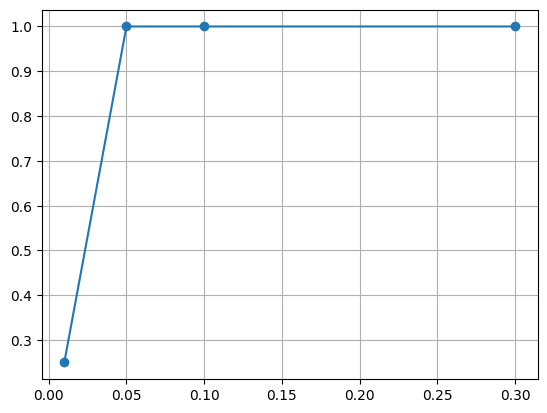

In [7]:
learning_rates = [0.01, 0.05, 0.1, 0.3]
epochs = 10
accuracy_learning = []

sys.stdout = io.StringIO()

for lr in learning_rates:
    accuracy = train(X, y, X, y, input_size=2, learning_rate=lr, epochs=epochs)
    accuracy_learning.append(accuracy)

sys.stdout = original_stdout

plt.plot(learning_rates, accuracy_learning, marker='o')
plt.grid(True)
plt.show()


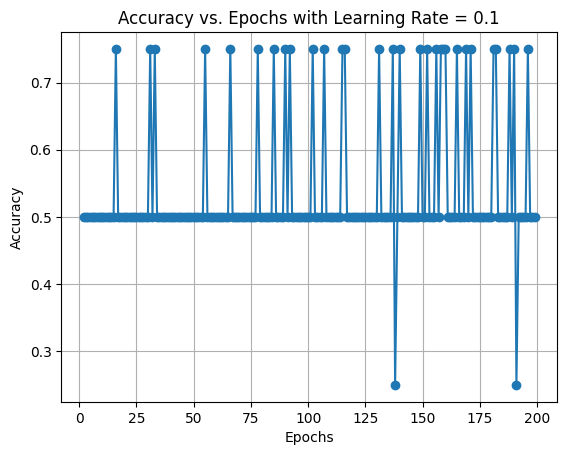

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
epochs = [i for i in range(2, 200)]
learning_rate = 0.001  
accuracy_epochs = []

original_stdout = sys.stdout
sys.stdout = io.StringIO()

for epoch in epochs:
    accuracy = train(X, y, X, y, input_size=2, learning_rate=learning_rate, epochs=epoch)
    accuracy_epochs.append(accuracy)

sys.stdout = original_stdout

# Plotting the results for varying epochs
plt.plot(epochs, accuracy_epochs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs with Learning Rate = 0.1')
plt.grid(True)
plt.show()

In [9]:
%load_ext autoreload
%autoreload 2

from Perceptron import Perceptron
sys.stdout = io.StringIO()

np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})
# Extract the values of all columns (variables x and y) except the last one fromDataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values
# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)
# Train the perceptron on the dataset
perceptron.trainSGD_linear(F, O)
# Test the trained model
sys.stdout = original_stdout

for data in x:
    prediction = perceptron.predict_linear(data)
    print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")


Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.95598945]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [30.84827587]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.05621977]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.91567295]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [6.17010947]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [6.16936046]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [3.12887366]
Input: 8.661761457749352, Actual: 27.985284373248057, Prediction: [28.22306111]
Input: 6.011150117432088, Actual: 20.033450352296263, Prediction: [19.99195699]
Input: 7.080725777960454, Actual: 23.242177333881365, Prediction: [23.31337514]
Input: 0.20584494295802447, Actual: 2.6175348288740734, Prediction: [1.96439081]
Input: 9.699098521619943, Actual: 31.097295564859827, Prediction: [31.4443668]
Input: 8.324426408004218, Actual: 26.973279

In [10]:
def linear_perceptron(F, O, input_size=1, learning_rate=0.001, epochs=10):
    perceptron = Perceptron(input_size=input_size, learning_rate=learning_rate, epochs=epochs)
    perceptron.trainSGD_linear(F, O)

    actual_values = O
    predictions = [perceptron.predict_linear(data_point) for data_point in F]

    mse = np.mean((actual_values - predictions) ** 2)
    print(f"Mean Squared Error (MSE): {mse}")

    ss_res = np.sum((actual_values - predictions) ** 2)

    mean_actual = np.mean(actual_values)
    ss_tot = np.sum((actual_values - mean_actual) ** 2)
    
    r_squared = 1 - (ss_res / ss_tot)
    print(f"Coefficient of Determination (R^2): {r_squared}")
    return mse, r_squared, perceptron

In [11]:
def draw(F, O):
    sys.stdout = io.StringIO()
    epoch = [i for i in range(1, 100)]
    mses = []
    for i in epoch:
        mse, _,  perceptron = linear_perceptron(F, O, epochs=i)
        mses.append(mse)
    sys.stdout = original_stdout
    plt.plot(epoch, mses)
    plt.show()

    plt.plot(F, O)
    plt.plot(F, [perceptron.predict_linear(data_point) for data_point in F])
    plt.legend()
    plt.show()

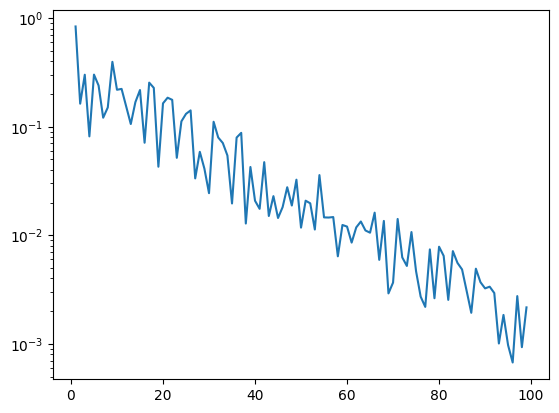

In [12]:
sys.stdout = io.StringIO()
epoch = [i for i in range(1, 100)]
mses = []
for i in epoch:
    mse, _,  perceptron = linear_perceptron(F, O, epochs=i)
    mses.append(mse)
sys.stdout = original_stdout
plt.yscale('log',base=10) 
plt.plot(epoch, mses)
plt.show()

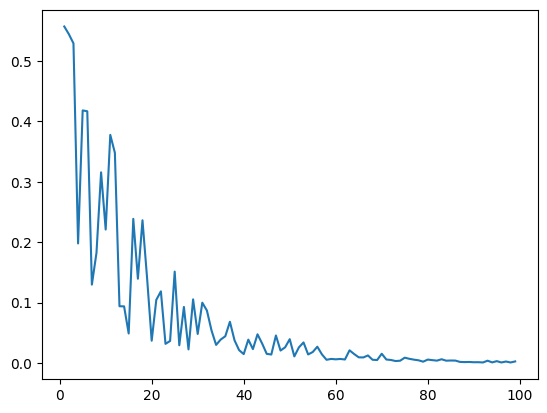

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


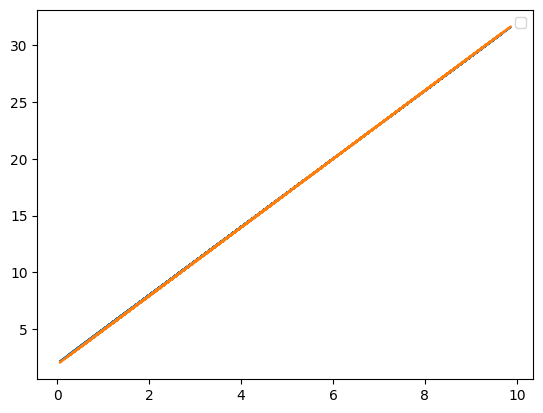

In [13]:
draw(F, O)

In [14]:
def draw(F, O):
    original_stdout = sys.stdout
    sys.stdout = io.StringIO()

    epochs = [i for i in range(1, 100)]
    mses = []
    for epoch in epochs:
        mse, _, perceptron = linear_perceptron(F, O, input_size=2, epochs=epoch)
        mses.append(mse)

    sys.stdout = original_stdout

    plt.plot(epochs, mses)
    plt.show()

    approximated_values = [perceptron.predict_linear(data_point) for data_point in F]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(F[:, 0], F[:, 1], O)
    ax.scatter(F[:, 0], F[:, 1], approximated_values, color='r')
    plt.legend()
    plt.show()

In [15]:
x = np.random.uniform(low=0, high=10, size=num_samples)
y = np.random.uniform(low=0, high=10, size=num_samples)

z = 2 * x + 3 * y
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'y': y, 'z': z})
# Extract the values of all columns (variables x and y) except the last one fromDataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

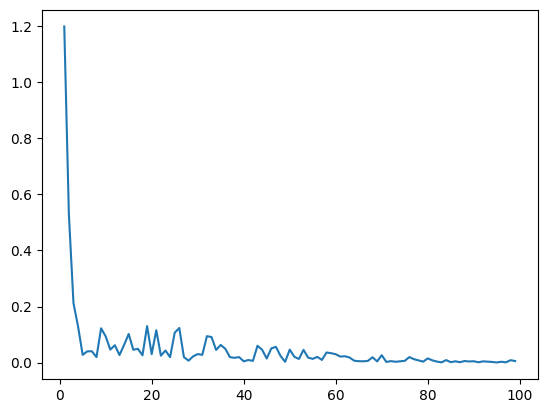

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


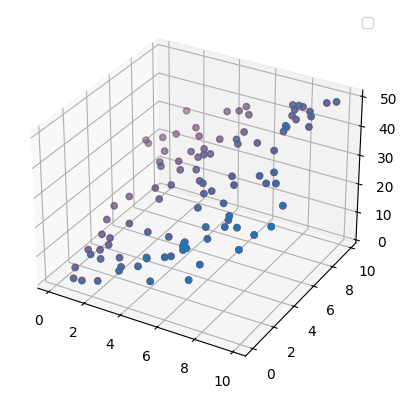

In [16]:
draw(F, O)

In [17]:
!pip install scikit-learn
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [37]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target


def mlp(X, y, hidden_layer_sizes=(10,), max_iter=100, learning_rate=0.01, activation='relu'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create an MLPClassifier with one hidden layer of 10 neurons
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate_init=learning_rate, activation=activation)
    # Train the MLPClassifier
    mlp.fit(X_train, y_train)
    # make prediction on the testing part
    y_pred = mlp.predict(X_test)
    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    # Plot the loss curve
    plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
    plt.title('Loss Curve during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Test Accuracy: 0.9500


/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


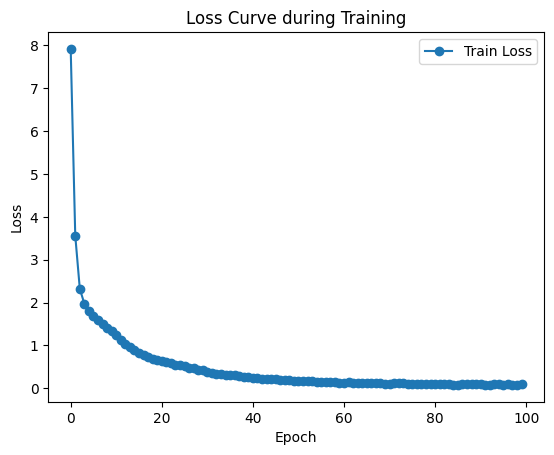

In [38]:
mlp(X,y)

Test Accuracy: 0.9361


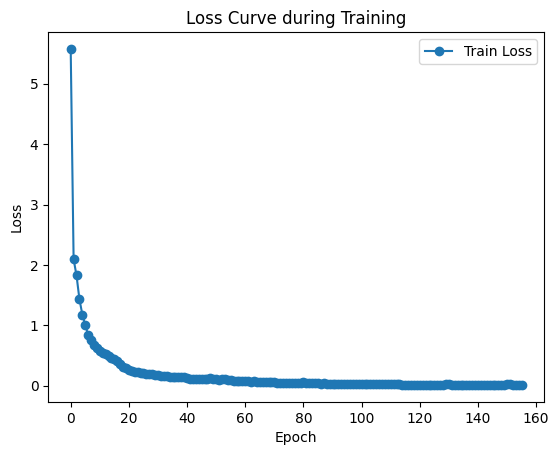

In [39]:
mlp(X, y, hidden_layer_sizes=(10,), max_iter=1000)

Test Accuracy: 0.9667


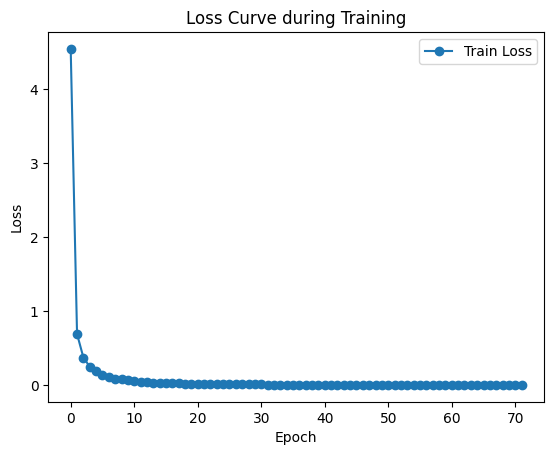

In [40]:
mlp(X, y, hidden_layer_sizes=(50,), max_iter=1000, learning_rate=0.01)

Test Accuracy: 0.9722


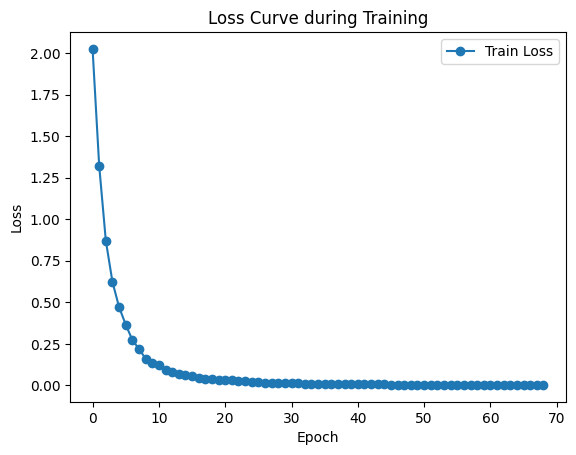

In [41]:
mlp(X, y, hidden_layer_sizes=(35, 15), max_iter=1000, learning_rate=0.01, activation='tanh')

In [24]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA


In [26]:
iris = load_iris()
X, y = iris.data, iris.target
# Select the two most important features based on information gain
k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = k_best.fit_transform(X, y)
def mal_selection(X_selected, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,
    random_state=42)
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Create two MLPClassifiers with different configurations
    mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
    mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)
    # Train the MLPClassifiers
    mlp1.fit(X_train, y_train)
    mlp2.fit(X_train, y_train)
    # Create subplots for decision regions and loss curves
    
    # Plot loss curve for mlp1
    axes[0, 0].plot(mlp1.loss_curve_, marker='o')
    axes[0, 0].set_title('MLP1 Loss Curve')
    axes[0, 0].set_xlabel('Iteration')
    axes[0, 0].set_ylabel('Loss')
    # Plot loss curve for mlp2
    axes[0, 1].plot(mlp2.loss_curve_, marker='o')
    axes[0, 1].set_title('MLP2 Loss Curve')
    axes[0, 1].set_xlabel('Iteration')
    axes[0, 1].set_ylabel('Loss')
    # Plot decision regions for mlp1
    plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
    axes[1, 0].set_title('Decision Regions - MLP1')
    axes[1, 0].set_xlabel('Feature 1')
    axes[1, 0].set_ylabel('Feature 2')
    # Plot decision regions for mlp2
    plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
    axes[1, 1].set_title('Decision Regions - MLP2')
    axes[1, 1].set_xlabel('Feature 1')
    axes[1, 1].set_ylabel('Feature 2')
    # Adjust layout for better spacing
    plt.tight_layout()
    # Show the plot
    plt.show()

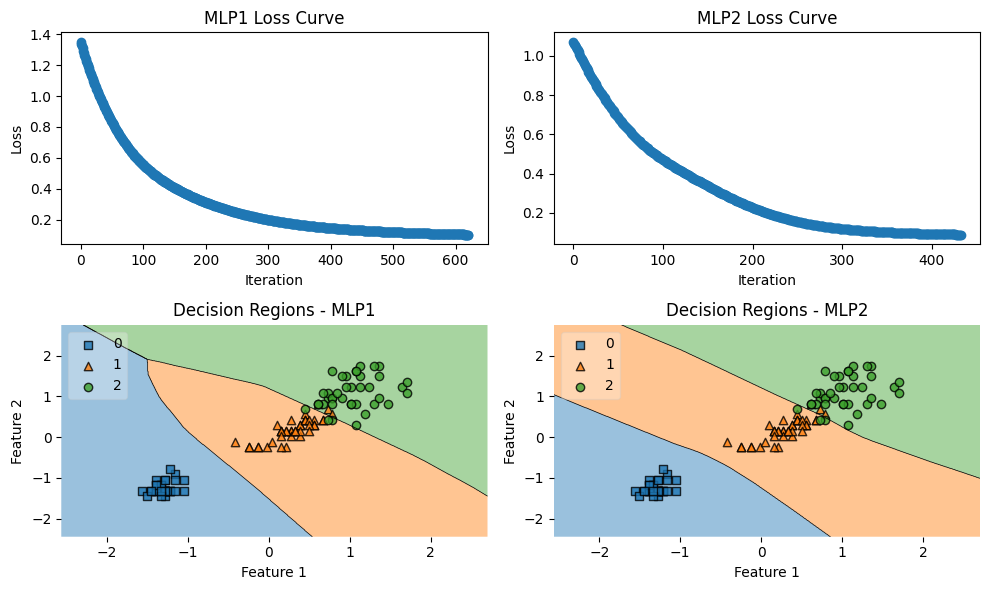

In [27]:
mal_selection(X_selected, y)

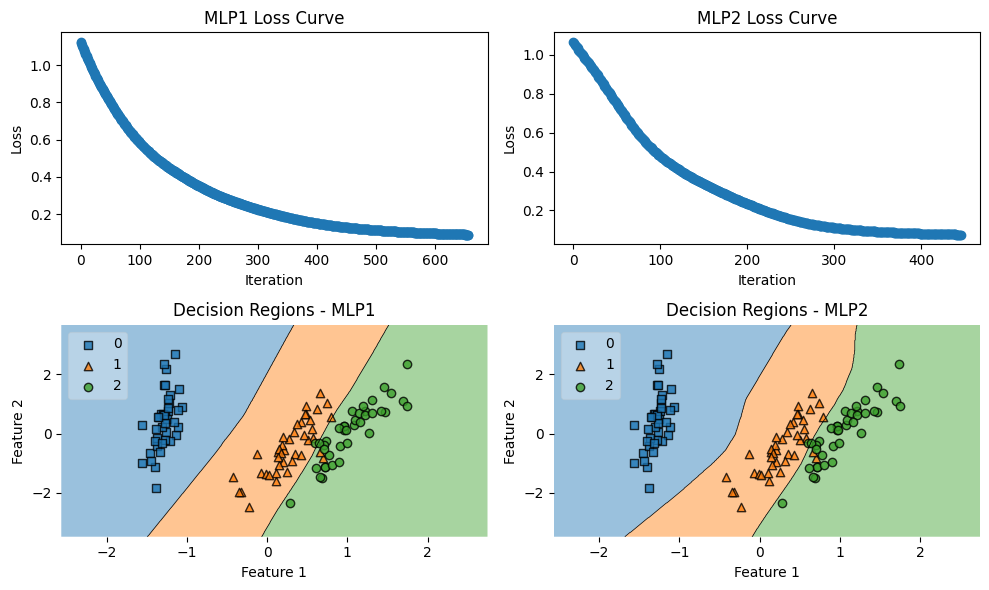

In [28]:
n_components = 2

pca = PCA(n_components=n_components)

# Fit the PCA on the data and transform the data
X_pca = pca.fit_transform(X)

In [29]:
file_path = './spiral.csv'
data = pd.read_csv(file_path)
# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

def mlps(X, y, mlp1, mlp2, mlp3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)
    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Create three MLPClassifiers with different configurations
    mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,
    activation='tanh',learning_rate_init=0.001)
    mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
    activation='tanh', learning_rate_init=0.001)
    mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
    activation='tanh', learning_rate_init=0.001)
    # Train the MLPClassifiers
    mlp1.fit(X_train, y_train)
    mlp2.fit(X_train, y_train)
    mlp3.fit(X_train, y_train)
    # Create subplots for decision regions and loss curves
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    # Plot loss curve for mlp1
    axes[0, 0].plot(mlp1.loss_curve_, marker='o')
    axes[0, 0].set_title('MLP1 Loss Curve')
    axes[0, 0].set_xlabel('Iteration')
    axes[0, 0].set_ylabel('Loss')
    # Plot loss curve for mlp2
    axes[0, 1].plot(mlp2.loss_curve_, marker='o')
    axes[0, 1].set_title('MLP2 Loss Curve')
    axes[0, 1].set_xlabel('Iteration')
    axes[0, 1].set_ylabel('Loss')
    # Plot loss curve for mlp3
    axes[0, 2].plot(mlp3.loss_curve_, marker='o')
    axes[0, 2].set_title('MLP3 Loss Curve')
    axes[0, 2].set_xlabel('Iteration')
    axes[0, 2].set_ylabel('Loss')
    plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
    axes[1, 0].set_title('Decision Regions - MLP1')
    axes[1, 0].set_xlabel('Feature 1')
    axes[1, 0].set_ylabel('Feature 2')
    # Plot decision regions for mlp2
    plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
    axes[1, 1].set_title('Decision Regions - MLP2')
    axes[1, 1].set_xlabel('Feature 1')
    axes[1, 1].set_ylabel('Feature 2')
    # Plot decision regions for mlp3
    plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
    axes[1, 2].set_title('Decision Regions - MLP3')
    axes[1, 2].set_xlabel('Feature 1')
    axes[1, 2].set_ylabel('Feature 2')
    # Adjust layout for better spacing
    plt.tight_layout()
    # Show the plot
    plt.show()


/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


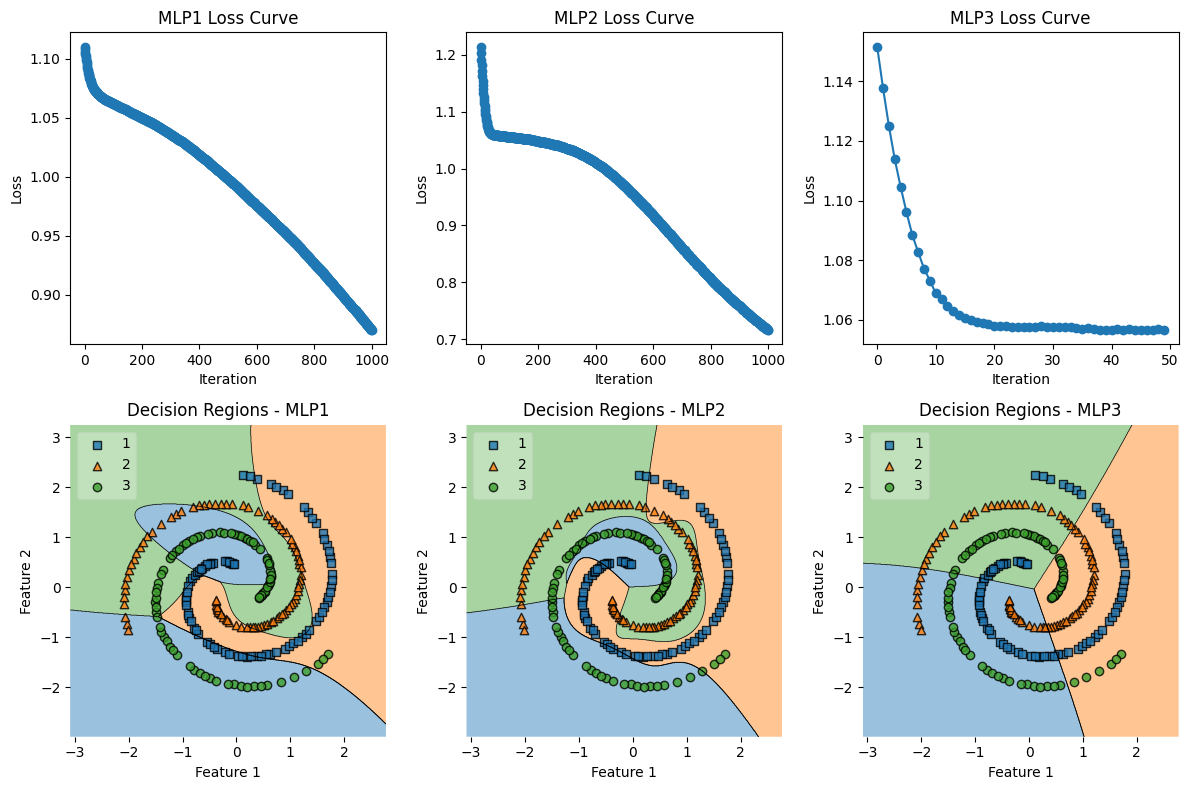

In [30]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,
activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlps(X, y, mlp1, mlp2, mlp3)

/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


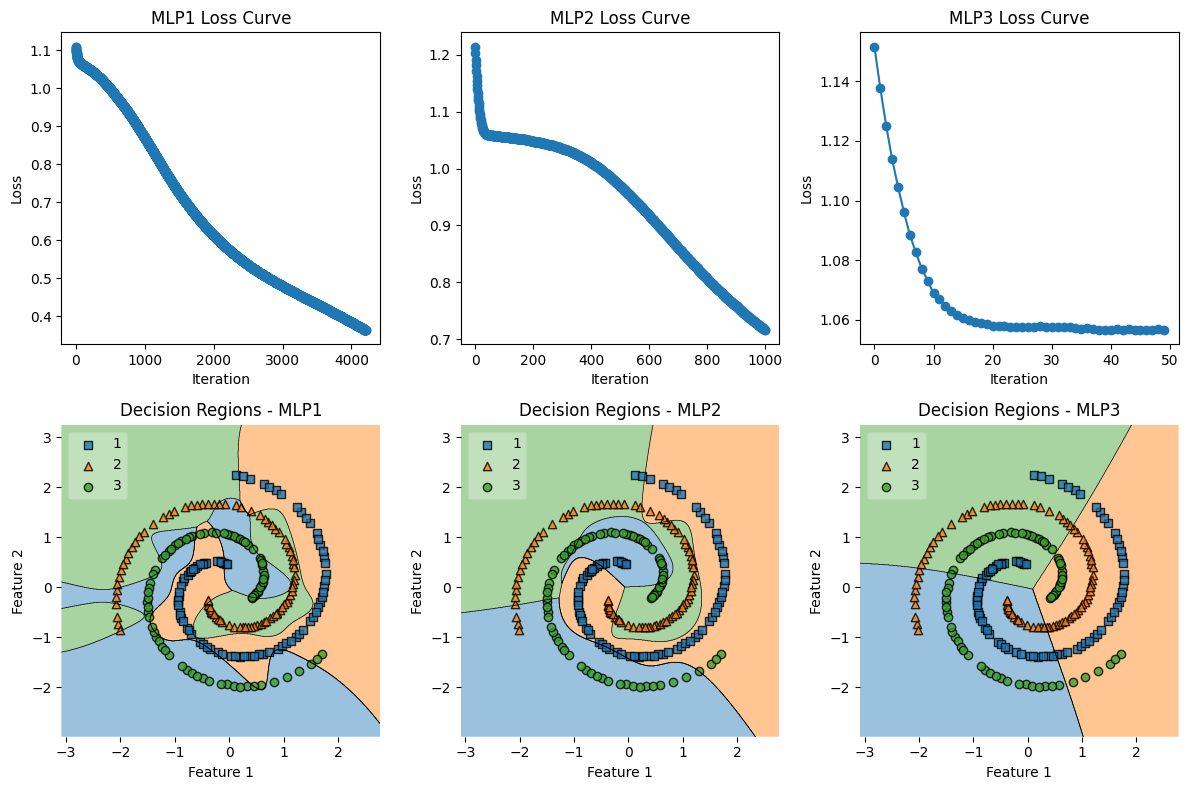

In [31]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=42,
activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlps(X, y, mlp1, mlp2, mlp3)

/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


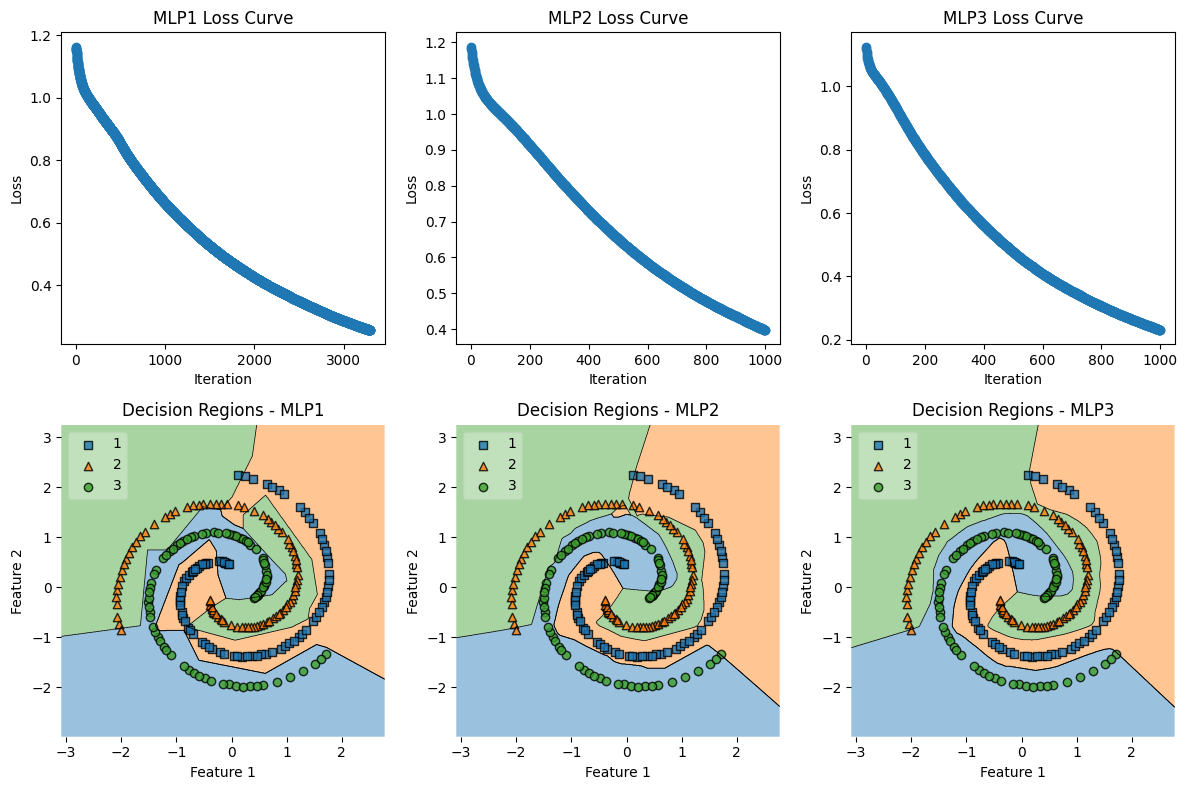

In [32]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=42,
activation='relu',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)
mlps(X, y, mlp1, mlp2, mlp3)

/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


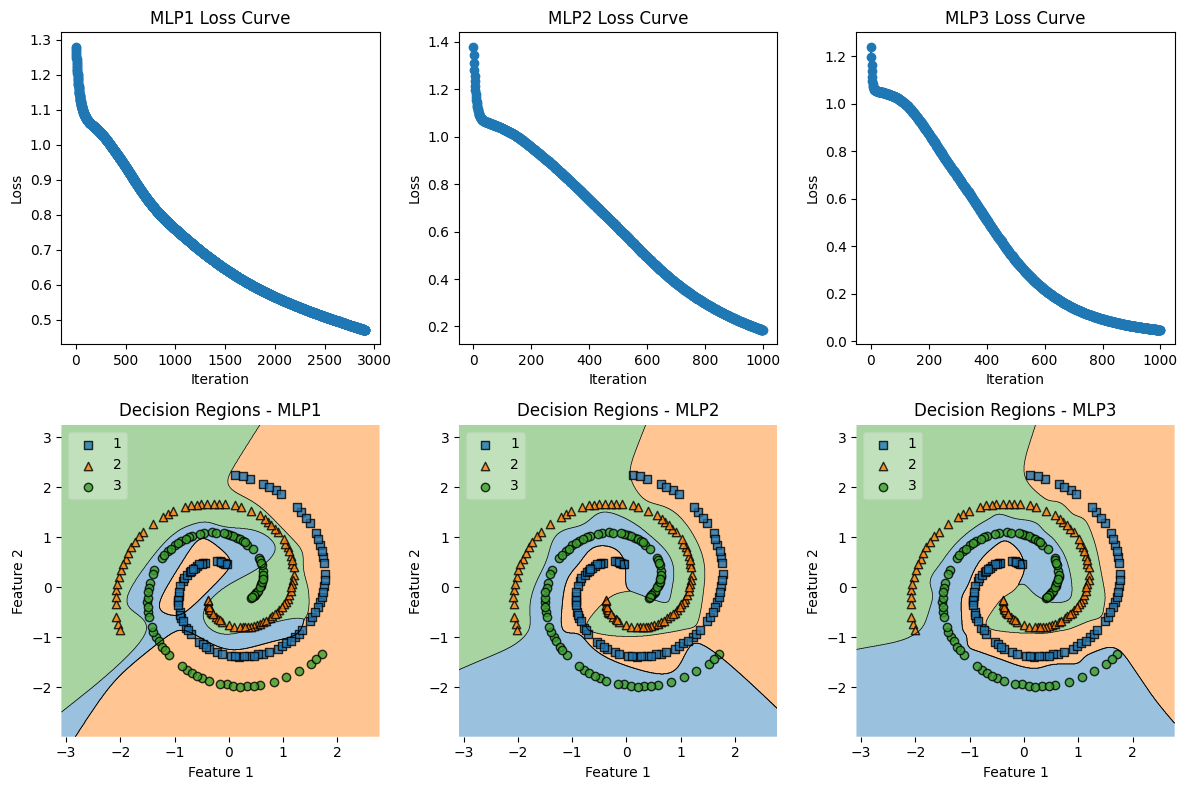

In [33]:
mlp1 = MLPClassifier(hidden_layer_sizes=(7, 3), max_iter=10000, random_state=42,
activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(70, 30), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlps(X, y, mlp1, mlp2, mlp3)

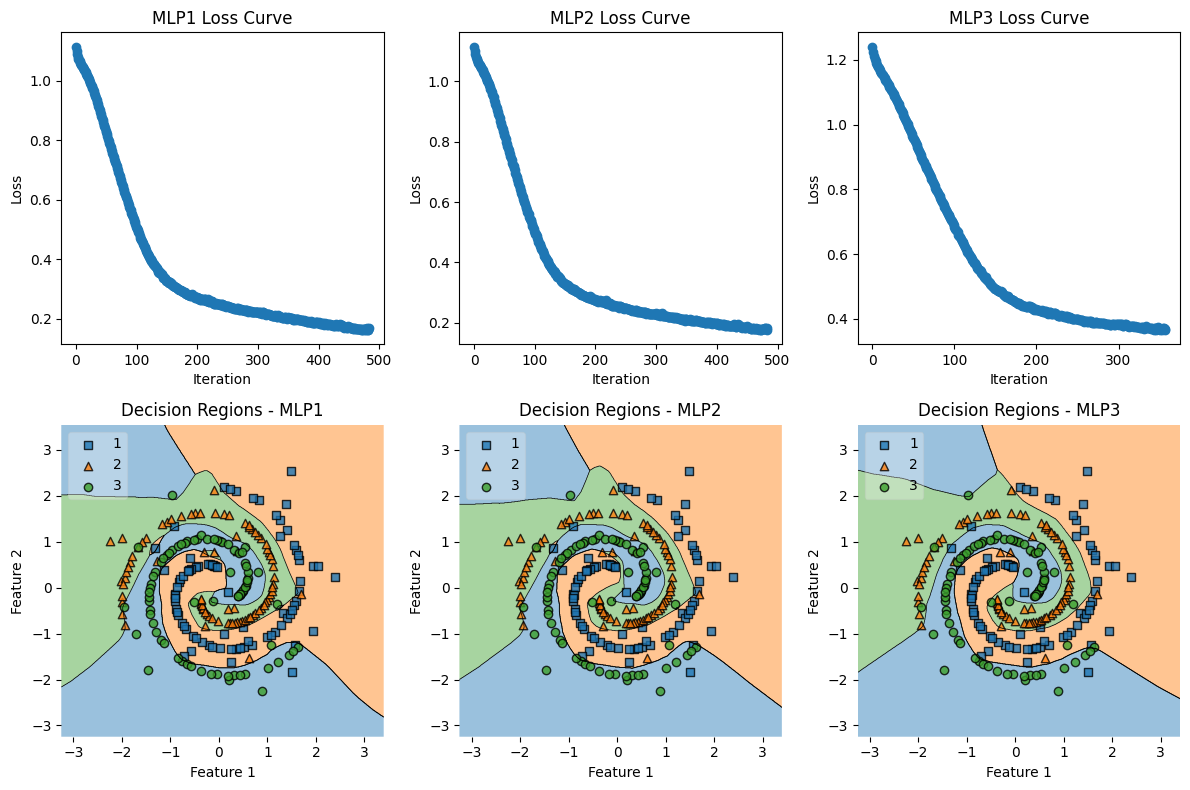

In [34]:
# Add outliers to a random subset of the data
outlier_fraction = 0.2 # Adjust the fraction of outliers based on yourpreference
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7,
(np.sum(outliers_mask), 2))
# Assuming the last column is the target variable and the rest are features
X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values

mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9,
beta_2=0.999, epsilon=1e-8)
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9,
beta_2=0.999, epsilon=1e-8, alpha=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
random_state=42, solver='adam',
learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.3)
mlps(X, y, mlp1, mlp2, mlp3)

In [47]:
file_path = './spiral.csv'
data = pd.read_csv(file_path)
# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
mlp = MLPClassifier(max_iter=1000, random_state=42)
# Define hyperparameter grid
param_grid = {
'hidden_layer_sizes': [(20), (60), (100), (13, 7), (40, 20)],
'activation': ['relu', 'tanh'],
}
# Instantiate GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
# Perform the hyperparameter search on the training data
grid_search.fit(X_train, y_train)
# Get the best hyperparameters and their corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
# Create the best model with the best parameters and train on the full training
set
best_model = MLPClassifier(**best_params, max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)
# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Test Accuracy:", test_accuracy)

/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmad/.local/lib/python3.10/site-packages/

Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (40, 20)}
Best Accuracy: 0.9918367346938777
Test Accuracy: 0.9841269841269841


Text(0, 0.5, 'Feature 2')

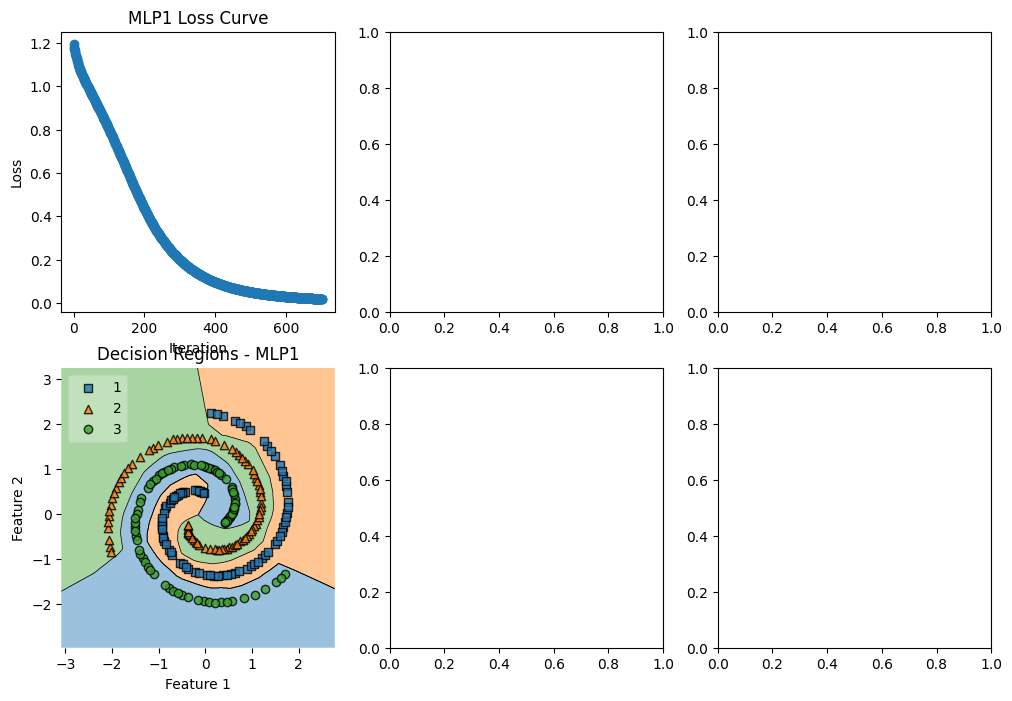

In [48]:
# Plot loss curve for mlp1
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].plot(best_model.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')
plot_decision_regions(X_train, y_train, clf=best_model, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')